In [2]:
pip install pyedflib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:

import numpy as np
from pyedflib import highlevel
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import shutil

In [2]:
def search_annotations_edf(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith("Hypnogram.edf")]
    return filenames

def search_signals_edf(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith("PSG.edf")]
    return filenames

def search_correct_annotations(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("Hypnogram.edf")]
    
    return filename

def search_signals_npy(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith(".npy")]
    return filenames

def search_correct_annotations_npy(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("npy")]
    
    return filename

def search_correct_signals_npy(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("npy")]
    
    return filename

In [3]:
import os
import numpy as np
from pyedflib import highlevel

def search_correct_annotations(signal_path, filename):
    """Find the corresponding annotation file for a given signal file."""
    base_filename = filename.split('-')[0] + filename.split('-')[1][:2] + 'EC-Hypnogram.edf'
    annotations = [f for f in os.listdir(signal_path) if f == base_filename]
    return annotations

path = '/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/' 
annotations_edf_list = search_annotations_edf(path)
signals_edf_list = search_signals_edf(path)

print('signals edf file list')
print(signals_edf_list)

print('annotations edf file list')
print(annotations_edf_list)

signals edf file list
['SC4001E0-PSG.edf', 'SC4002E0-PSG.edf', 'SC4011E0-PSG.edf', 'SC4012E0-PSG.edf', 'SC4021E0-PSG.edf', 'SC4022E0-PSG.edf', 'SC4031E0-PSG.edf', 'SC4032E0-PSG.edf', 'SC4041E0-PSG.edf', 'SC4042E0-PSG.edf', 'SC4051E0-PSG.edf', 'SC4052E0-PSG.edf', 'SC4061E0-PSG.edf', 'SC4062E0-PSG.edf', 'SC4071E0-PSG.edf', 'SC4072E0-PSG.edf', 'SC4081E0-PSG.edf', 'SC4082E0-PSG.edf', 'SC4091E0-PSG.edf', 'SC4092E0-PSG.edf', 'SC4101E0-PSG.edf', 'SC4102E0-PSG.edf', 'SC4111E0-PSG.edf', 'SC4112E0-PSG.edf', 'SC4121E0-PSG.edf', 'SC4122E0-PSG.edf', 'SC4131E0-PSG.edf', 'SC4141E0-PSG.edf', 'SC4142E0-PSG.edf', 'SC4151E0-PSG.edf', 'SC4152E0-PSG.edf', 'SC4161E0-PSG.edf', 'SC4162E0-PSG.edf', 'SC4171E0-PSG.edf', 'SC4172E0-PSG.edf', 'SC4181E0-PSG.edf', 'SC4182E0-PSG.edf', 'SC4191E0-PSG.edf', 'SC4192E0-PSG.edf', 'SC4201E0-PSG.edf', 'SC4202E0-PSG.edf', 'SC4211E0-PSG.edf', 'SC4212E0-PSG.edf', 'SC4221E0-PSG.edf', 'SC4222E0-PSG.edf', 'SC4231E0-PSG.edf', 'SC4232E0-PSG.edf', 'SC4241E0-PSG.edf', 'SC4242E0-PSG.edf

In [4]:
path = '/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette' # sleep-edf 2013 데이터를 가지고 있는 폴더 명
annotations_edf_list = search_annotations_edf(path)
signals_edf_list = search_signals_edf(path)

print('signals edf file list')
print(signals_edf_list)

print('annotations edf file list')
print(annotations_edf_list)

signals edf file list
['SC4001E0-PSG.edf', 'SC4002E0-PSG.edf', 'SC4011E0-PSG.edf', 'SC4012E0-PSG.edf', 'SC4021E0-PSG.edf', 'SC4022E0-PSG.edf', 'SC4031E0-PSG.edf', 'SC4032E0-PSG.edf', 'SC4041E0-PSG.edf', 'SC4042E0-PSG.edf', 'SC4051E0-PSG.edf', 'SC4052E0-PSG.edf', 'SC4061E0-PSG.edf', 'SC4062E0-PSG.edf', 'SC4071E0-PSG.edf', 'SC4072E0-PSG.edf', 'SC4081E0-PSG.edf', 'SC4082E0-PSG.edf', 'SC4091E0-PSG.edf', 'SC4092E0-PSG.edf', 'SC4101E0-PSG.edf', 'SC4102E0-PSG.edf', 'SC4111E0-PSG.edf', 'SC4112E0-PSG.edf', 'SC4121E0-PSG.edf', 'SC4122E0-PSG.edf', 'SC4131E0-PSG.edf', 'SC4141E0-PSG.edf', 'SC4142E0-PSG.edf', 'SC4151E0-PSG.edf', 'SC4152E0-PSG.edf', 'SC4161E0-PSG.edf', 'SC4162E0-PSG.edf', 'SC4171E0-PSG.edf', 'SC4172E0-PSG.edf', 'SC4181E0-PSG.edf', 'SC4182E0-PSG.edf', 'SC4191E0-PSG.edf', 'SC4192E0-PSG.edf', 'SC4201E0-PSG.edf', 'SC4202E0-PSG.edf', 'SC4211E0-PSG.edf', 'SC4212E0-PSG.edf', 'SC4221E0-PSG.edf', 'SC4222E0-PSG.edf', 'SC4231E0-PSG.edf', 'SC4232E0-PSG.edf', 'SC4241E0-PSG.edf', 'SC4242E0-PSG.edf

In [5]:
import os
import numpy as np
from pyedflib import highlevel

def search_correct_annotations(signal_path, filename):
    """Find the corresponding annotation file for a given signal file."""
    base_filename = filename.split('-')[0] + 'EC-Hypnogram.edf'
    annotations = [f for f in os.listdir(signal_path) if f.endswith('Hypnogram.edf') and f.startswith(base_filename[:6])]
    return annotations

path = '/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/'  # sleep-edf 2013 데이터를 가지고 있는 폴더 명
annotations_edf_list = [f for f in os.listdir(path) if 'Hypnogram.edf' in f]
signals_edf_list = [f for f in os.listdir(path) if 'PSG.edf' in f]

print('signals edf file list')
print(signals_edf_list)

print('annotations edf file list')
print(annotations_edf_list)

# 코드의 나머지 부분
epoch_size = 30
sample_rate = 100
save_signals_path = path + 'origin_npy/'
save_annotations_path = save_signals_path + 'annotations/'

os.makedirs(save_annotations_path, exist_ok=True)
os.makedirs(save_signals_path, exist_ok=True)

for filename in signals_edf_list:
    signals_filename = filename
    annotations = search_correct_annotations(path, filename)
    
    if not annotations:
        print(f"No annotation file found for {signals_filename}")
        continue
    
    annotations_filename = annotations[0]
    
    signals_filename = path + signals_filename
    annotations_filename = path + annotations_filename
    
    _, _, annotations_header = highlevel.read_edf(annotations_filename)
    
    label = []
    for ann in annotations_header['annotations']:
        start = ann[0]
        length = ann[1]
        length = int(float(length) // epoch_size)  # label은 30초 간격으로 사용할 것이기 때문에 30으로 나눈 값이 해당 sleep stage가 반복된 횟수이다.
        
        if ann[2] == 'Sleep stage W':
            for time in range(length):
                label.append(0)
        elif ann[2] == 'Sleep stage 1':
            for time in range(length):
                label.append(1)
        elif ann[2] == 'Sleep stage 2':
            for time in range(length):
                label.append(2)
        elif ann[2] == 'Sleep stage 3':
            for time in range(length):
                label.append(3)
        elif ann[2] == 'Sleep stage 4':
            for time in range(length):
                label.append(3)
        elif ann[2] == 'Sleep stage R':
            for time in range(length):
                label.append(4)
        else:
            for time in range(length):
                label.append(5)
    label = np.array(label)
    signals, _, signals_header = highlevel.read_edf(signals_filename)
    
    signals_len = len(signals[0]) // sample_rate // epoch_size
    annotations_len = len(label)
    if signals_header['startdate'] == annotations_header['startdate']:
        print("%s file's signal & annotations start time is same" % signals_filename.split('/')[-1])
        
        if signals_len > annotations_len:
            signals = signals[:3][:annotations_len]
        elif signals_len < annotations_len:
            signals = signals[:3]
            label = label[:signals_len]
        else:
            signals = signals[:3]
        signals = np.array(signals)
        
        np.save(save_signals_path + signals_filename.split('/')[-1].split('.')[0], signals)
        np.save(save_annotations_path + annotations_filename.split('/')[-1].split('.')[0], label)
        
        if (len(signals[0]) // sample_rate // epoch_size != len(label)):
            print('signals len: %d / annotations len: %d' % (len(signals[0]) // sample_rate // epoch_size, len(label)))
        
    else:
        print("%s file's signal & annotations start time is different" % signals_filename.split('/')[-1])

signals edf file list
['SC4001E0-PSG.edf', 'SC4002E0-PSG.edf', 'SC4011E0-PSG.edf', 'SC4012E0-PSG.edf', 'SC4021E0-PSG.edf', 'SC4022E0-PSG.edf', 'SC4031E0-PSG.edf', 'SC4032E0-PSG.edf', 'SC4041E0-PSG.edf', 'SC4042E0-PSG.edf', 'SC4051E0-PSG.edf', 'SC4052E0-PSG.edf', 'SC4061E0-PSG.edf', 'SC4062E0-PSG.edf', 'SC4071E0-PSG.edf', 'SC4072E0-PSG.edf', 'SC4081E0-PSG.edf', 'SC4082E0-PSG.edf', 'SC4091E0-PSG.edf', 'SC4092E0-PSG.edf', 'SC4101E0-PSG.edf', 'SC4102E0-PSG.edf', 'SC4111E0-PSG.edf', 'SC4112E0-PSG.edf', 'SC4121E0-PSG.edf', 'SC4122E0-PSG.edf', 'SC4131E0-PSG.edf', 'SC4141E0-PSG.edf', 'SC4142E0-PSG.edf', 'SC4151E0-PSG.edf', 'SC4152E0-PSG.edf', 'SC4161E0-PSG.edf', 'SC4162E0-PSG.edf', 'SC4171E0-PSG.edf', 'SC4172E0-PSG.edf', 'SC4181E0-PSG.edf', 'SC4182E0-PSG.edf', 'SC4191E0-PSG.edf', 'SC4192E0-PSG.edf', 'SC4201E0-PSG.edf', 'SC4202E0-PSG.edf', 'SC4211E0-PSG.edf', 'SC4212E0-PSG.edf', 'SC4221E0-PSG.edf', 'SC4222E0-PSG.edf', 'SC4231E0-PSG.edf', 'SC4232E0-PSG.edf', 'SC4241E0-PSG.edf', 'SC4242E0-PSG.edf

SC4091E0-PSG.edf file's signal & annotations start time is same
SC4092E0-PSG.edf file's signal & annotations start time is same
SC4101E0-PSG.edf file's signal & annotations start time is same
SC4102E0-PSG.edf file's signal & annotations start time is same
SC4111E0-PSG.edf file's signal & annotations start time is same
SC4112E0-PSG.edf file's signal & annotations start time is same
SC4121E0-PSG.edf file's signal & annotations start time is same


KeyboardInterrupt: 

In [8]:
epoch_size = 30
sample_rate = 100

path =  '/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/origin_npy/'

signals_npy_list = search_signals_npy(path)

print(signals_npy_list)

channel_name_list = ['Fpz-Cz/','Pz-Oz/','EOG/']
for channel_index,channel_name in enumerate(channel_name_list):
    save_path = path + channel_name
    os.makedirs(save_path,exist_ok=True)

    for filename in signals_npy_list:
        signals_filename = filename

        signals_filename = path + signals_filename
        
        signals = np.load(signals_filename)
        
        signals = signals[channel_index].reshape(1,-1)
        print(signals.shape)
        
        np.save(save_path + filename,signals)

['SC4001E0-PSG.npy', 'SC4002E0-PSG.npy', 'SC4011E0-PSG.npy', 'SC4012E0-PSG.npy', 'SC4021E0-PSG.npy', 'SC4022E0-PSG.npy', 'SC4031E0-PSG.npy', 'SC4032E0-PSG.npy', 'SC4041E0-PSG.npy', 'SC4042E0-PSG.npy', 'SC4051E0-PSG.npy', 'SC4052E0-PSG.npy', 'SC4061E0-PSG.npy', 'SC4062E0-PSG.npy', 'SC4071E0-PSG.npy', 'SC4072E0-PSG.npy', 'SC4081E0-PSG.npy', 'SC4082E0-PSG.npy', 'SC4091E0-PSG.npy', 'SC4092E0-PSG.npy', 'SC4101E0-PSG.npy', 'SC4102E0-PSG.npy', 'SC4111E0-PSG.npy', 'SC4112E0-PSG.npy', 'SC4121E0-PSG.npy', 'SC4122E0-PSG.npy', 'SC4131E0-PSG.npy', 'SC4141E0-PSG.npy', 'SC4142E0-PSG.npy', 'SC4151E0-PSG.npy', 'SC4152E0-PSG.npy', 'SC4161E0-PSG.npy', 'SC4162E0-PSG.npy', 'SC4171E0-PSG.npy', 'SC4172E0-PSG.npy', 'SC4181E0-PSG.npy', 'SC4182E0-PSG.npy', 'SC4191E0-PSG.npy', 'SC4192E0-PSG.npy', 'SC4201E0-PSG.npy', 'SC4202E0-PSG.npy', 'SC4211E0-PSG.npy', 'SC4212E0-PSG.npy', 'SC4221E0-PSG.npy', 'SC4222E0-PSG.npy', 'SC4231E0-PSG.npy', 'SC4232E0-PSG.npy', 'SC4241E0-PSG.npy', 'SC4242E0-PSG.npy', 'SC4251E0-PSG.npy',

(1, 8568000)
(1, 8220000)
(1, 8370000)
(1, 8640000)
(1, 8640000)
(1, 8400000)
(1, 6408000)
(1, 8250000)
(1, 8310000)
(1, 8136000)
(1, 8250000)
(1, 8322000)
(1, 7806000)
(1, 8232000)
(1, 8220000)
(1, 8040000)
(1, 8316000)
(1, 8430000)
(1, 8112000)
(1, 8400000)
(1, 8550000)
(1, 8640000)
(1, 8214000)
(1, 7902000)
(1, 8460000)
(1, 6120000)
(1, 8190000)
(1, 8400000)
(1, 7950000)
(1, 8190000)
(1, 7836000)
(1, 8568000)
(1, 8274000)
(1, 8544000)
(1, 8040000)
(1, 8370000)
(1, 8580000)
(1, 8520000)
(1, 8220000)
(1, 8460000)
(1, 8340000)
(1, 7740000)
(1, 8040000)
(1, 7872000)
(1, 8190000)
(1, 8460000)
(1, 7026000)
(1, 8238000)
(1, 8340000)
(1, 7560000)
(1, 8070000)
(1, 7950000)
(1, 8040000)
(1, 7410000)
(1, 7890000)
(1, 8430000)
(1, 8268000)
(1, 6726000)
(1, 8322000)
(1, 8430000)
(1, 7206000)
(1, 7248000)
(1, 8166000)
(1, 8430000)


(1, 7950000)
dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[3.33735244 2.15145548 1.63414013 1.11329588 0.92412534 0.85302535
 0.53983022 0.41163112 0.26733588 0.20872826 0.16607528 0.14868039
 0.13148689 0.0915837  0.08746033]


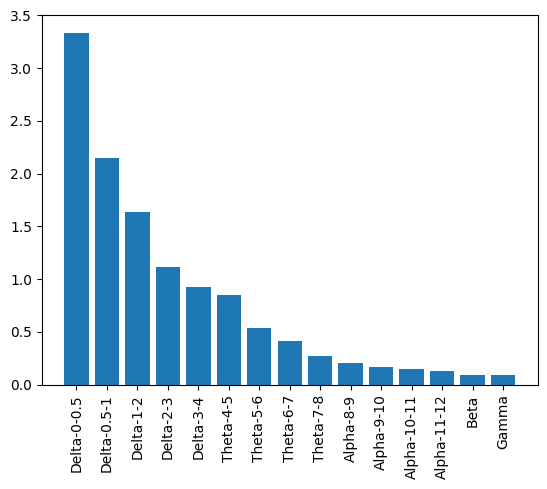

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.34155039 1.61463337 1.34222227 0.92548236 0.72492157 0.47962103
 0.39036499 0.32805505 0.25832854 0.20652617 0.19607937 0.17084384
 0.18769468 0.1534333  0.14430118]


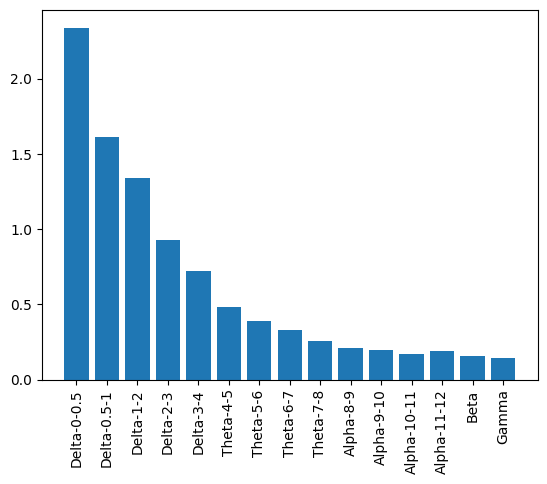

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[3.40640219 2.13679091 1.43210064 0.71992845 0.52246843 0.38660811
 0.26844232 0.22909642 0.21032251 0.27261499 0.22550562 0.15713427
 0.15496087 0.11298878 0.12509272]


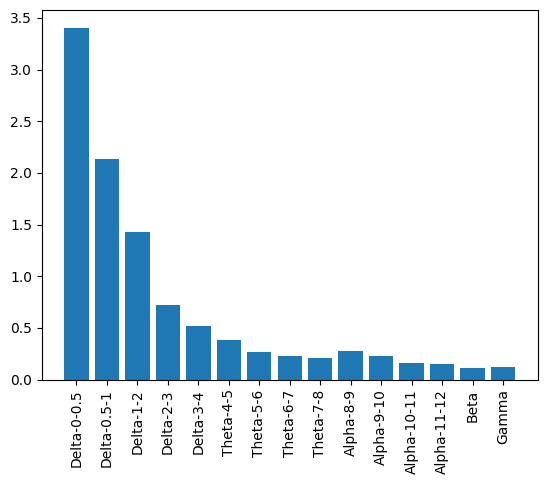

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.52951876 0.72542337 1.18627106 0.61742693 0.45176833 0.25718421
 0.2258657  0.27424509 0.24870138 0.32279311 0.21735579 0.10421689
 0.09184562 0.07786675 0.07038368]


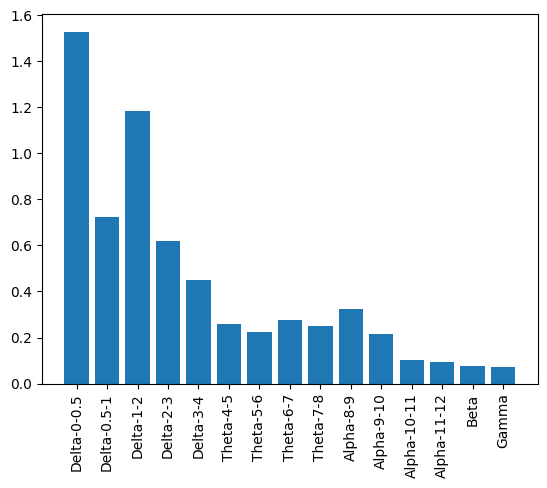

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[0.76269347 0.8657661  1.03929285 0.99517189 0.33214206 0.33399917
 0.25298919 0.3342104  0.52050808 0.26969171 0.19464459 0.11007268
 0.11946048 0.07313885 0.06630191]


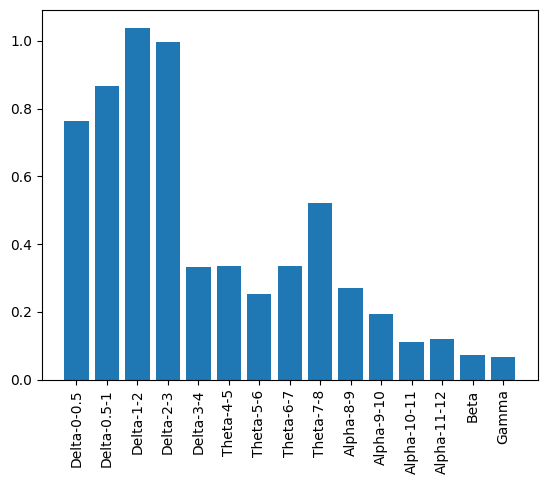

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.05172716 1.54750342 1.54192202 1.17500205 0.98328989 1.0110445
 0.50610788 0.36333207 0.32811757 0.25403519 0.18128581 0.14402526
 0.1397752  0.09422018 0.08007823]


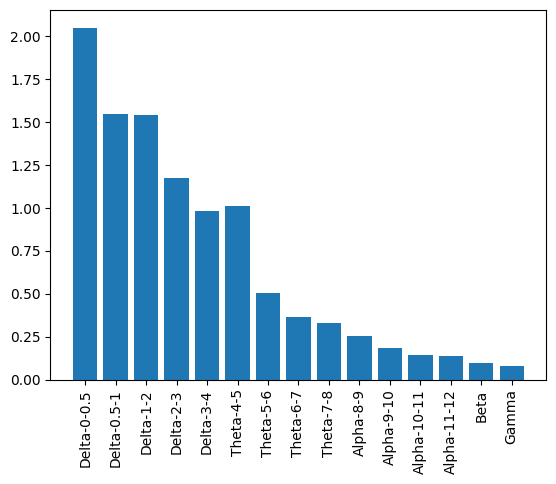

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.37367406 2.27177581 1.90986518 1.11645306 0.85808355 0.64032472
 0.48040152 0.4246694  0.25881975 0.25908529 0.2027327  0.20485716
 0.16342408 0.17818739 0.17784594]


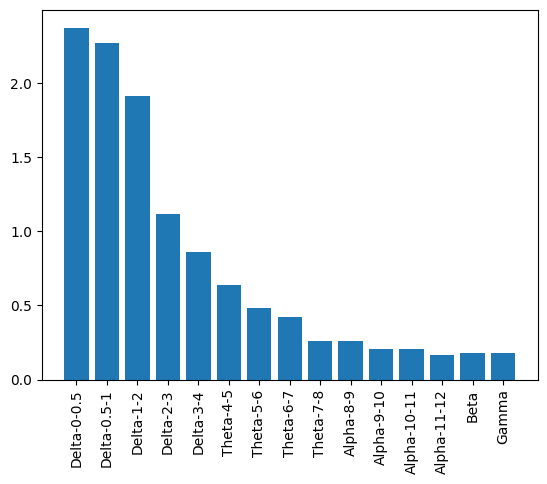

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[3.39027523 2.42366584 1.76105931 0.83454206 0.77702741 0.57545287
 0.45604439 0.30159203 0.23344082 0.15546534 0.14564524 0.11773901
 0.1160537  0.08346681 0.07694257]


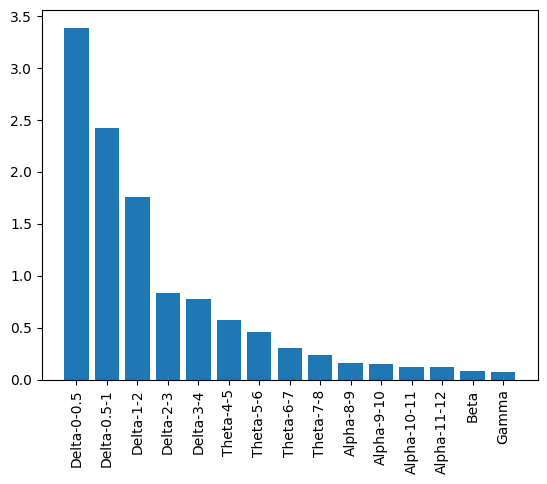

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.21982071 1.17630828 1.22297787 0.91346337 0.75963752 0.60734405
 0.43270253 0.36742226 0.26486523 0.19505464 0.14235127 0.15010474
 0.13388789 0.08660252 0.08166614]


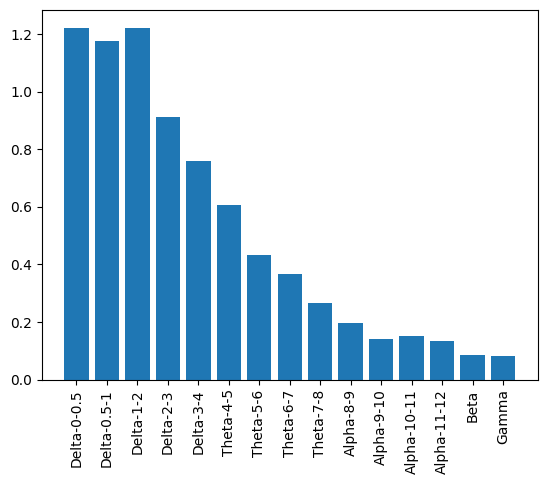

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.87089485 2.00006307 1.37462874 1.08425176 0.67842374 0.493807
 0.38288333 0.3085256  0.21576527 0.17651327 0.16827875 0.15218531
 0.13010583 0.12112343 0.12752261]


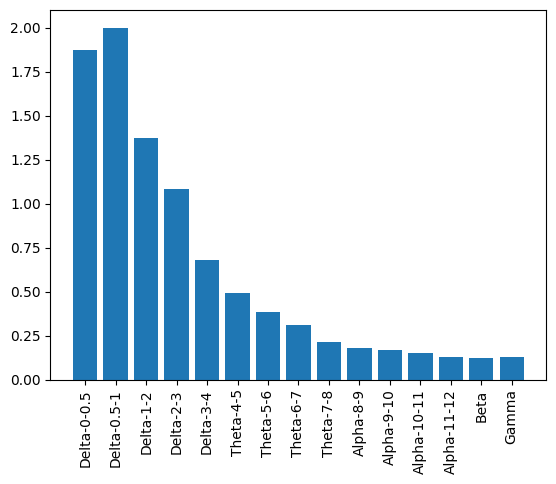

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.41599249 2.45712394 1.50453419 0.92300644 0.64265273 0.45893621
 0.35003603 0.29994159 0.22095463 0.16954378 0.2087639  0.1595511
 0.16249042 0.09501819 0.08867427]


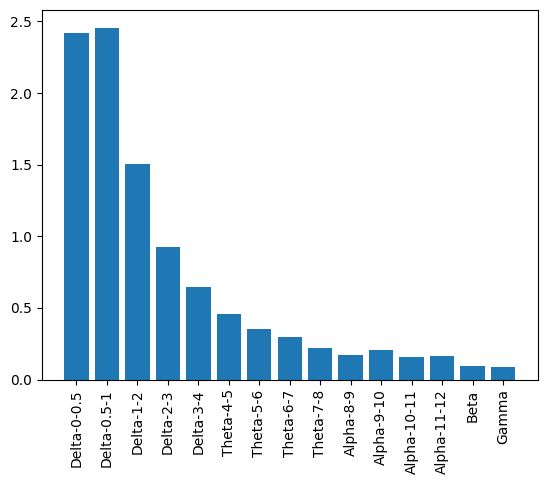

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[3.24256521 2.41664726 1.52215185 1.12242564 0.7836751  0.54748708
 0.36186853 0.36927816 0.2692459  0.1849223  0.18233524 0.14565681
 0.12655106 0.11094922 0.11026603]


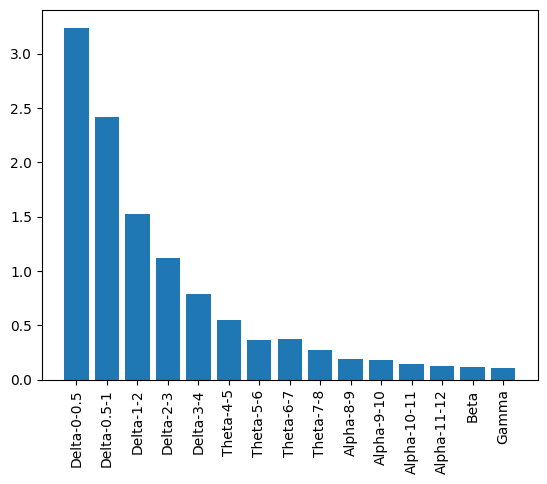

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.92690413 2.17668748 1.78330847 0.98071351 0.78018953 0.63453972
 0.47481775 0.39488694 0.28713065 0.24337779 0.18264999 0.137083
 0.12806259 0.10352048 0.10219117]


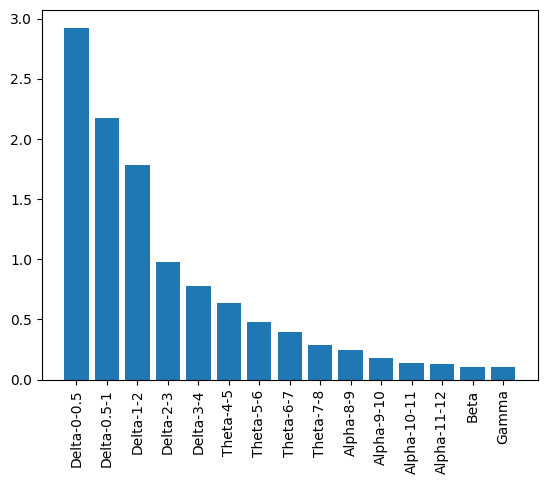

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.93105328 1.81180837 1.14718477 0.8534153  0.72904426 0.53770332
 0.40234914 0.29083105 0.25291814 0.17385588 0.14336161 0.1184045
 0.11513181 0.09480099 0.09745311]


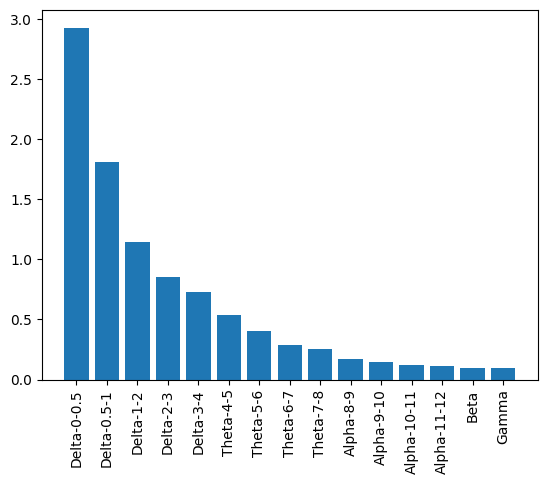

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.73913714 1.15538316 1.05887212 0.58505642 0.49015749 0.31066234
 0.27873164 0.20849383 0.14671244 0.10122029 0.0993356  0.08809683
 0.09985734 0.06974899 0.06490422]


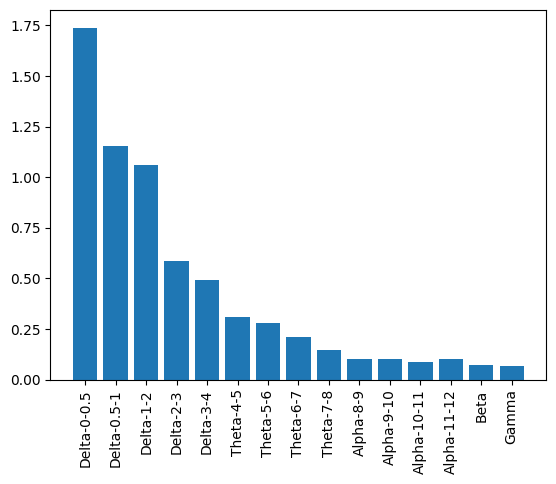

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.90596759 1.72768602 1.36999219 0.99506529 0.62040041 0.42355537
 0.38607671 0.23567712 0.24086648 0.1933807  0.18045344 0.14263623
 0.11286823 0.10032039 0.10512916]


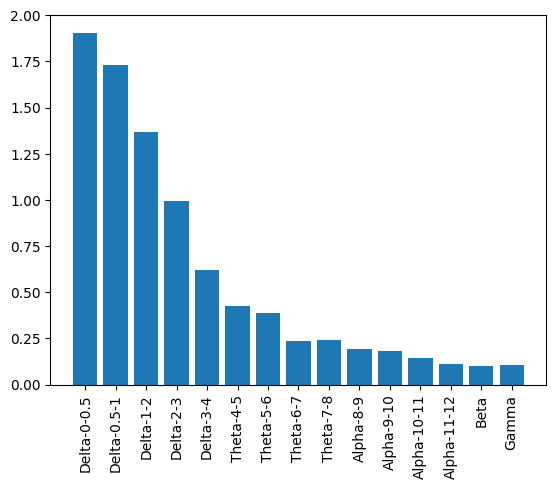

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.86049929 1.17949504 0.9053282  0.8136072  0.54071719 0.3943622
 0.30750251 0.27554205 0.19456815 0.15560456 0.14636371 0.140808
 0.1049423  0.09473551 0.09093609]


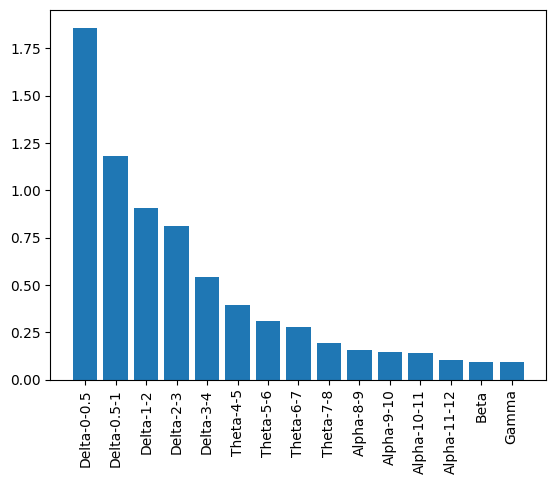

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.98497384 1.62783406 1.40509042 0.87873179 0.7683098  0.50943373
 0.33731984 0.34849566 0.24874572 0.21691438 0.17139874 0.15600024
 0.12420659 0.10677876 0.09861732]


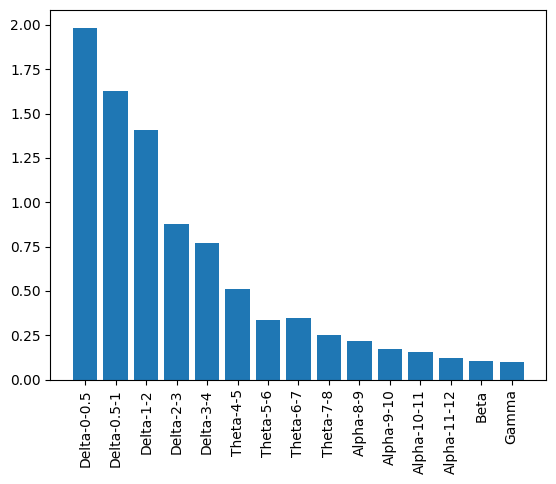

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.17556386 1.4205954  1.23227419 0.82837383 0.66120357 0.51090695
 0.29536515 0.30746293 0.25326695 0.1993522  0.13269666 0.12861682
 0.13850855 0.08920653 0.09314919]


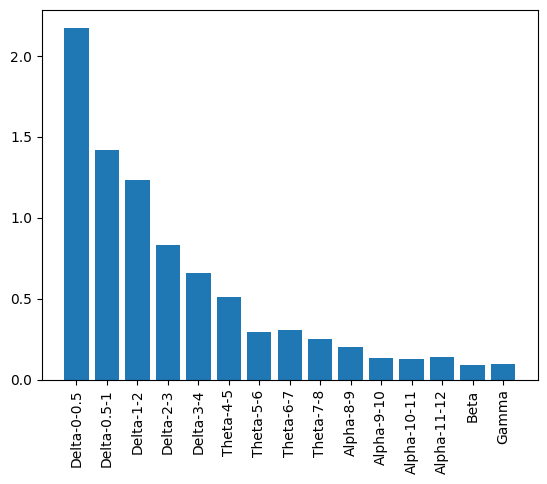

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.31115247 1.04097954 1.05511579 0.67386913 0.45649018 0.35307808
 0.32115258 0.2332247  0.20188561 0.1469351  0.16215134 0.13046747
 0.09831237 0.11261798 0.11283294]


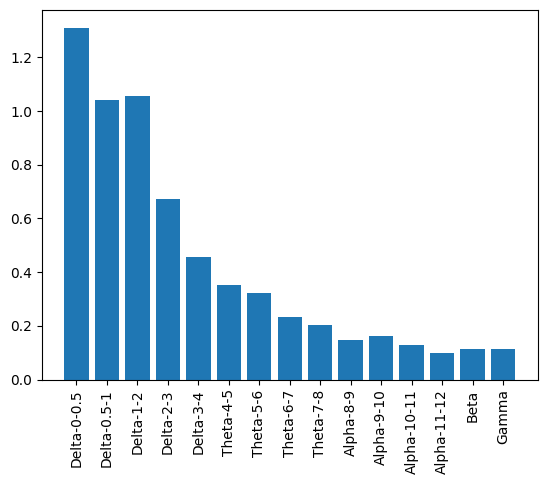

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.7188157  1.22691732 1.06506141 0.62564155 0.47084389 0.34457941
 0.23906019 0.18424401 0.18195869 0.14853783 0.12869517 0.12859175
 0.09144686 0.08503605 0.08248873]


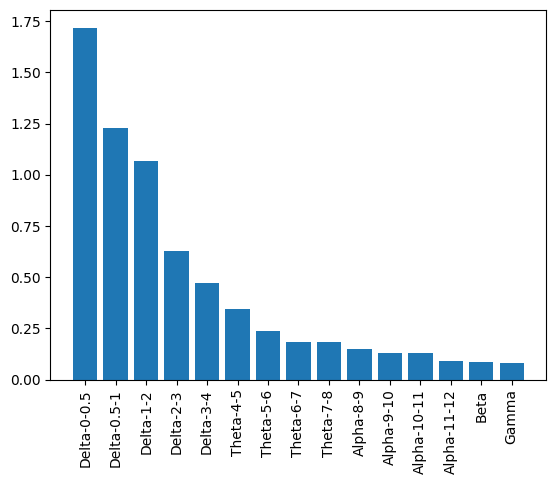

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.02355344 0.88440067 0.71048684 0.59410664 0.4440533  0.3204171
 0.24197787 0.24561544 0.16169167 0.14628983 0.12198332 0.12355602
 0.11614398 0.07550158 0.07241151]


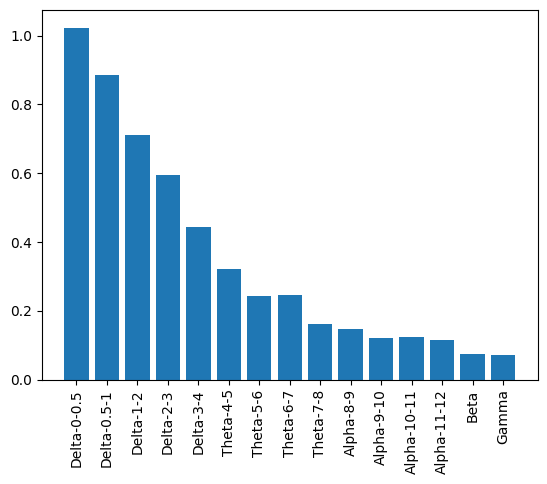

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.10240794 0.85950508 0.81902771 0.48939367 0.35561498 0.24826447
 0.20142558 0.17741139 0.16449256 0.15045627 0.10733074 0.13498179
 0.13709481 0.09727119 0.09630904]


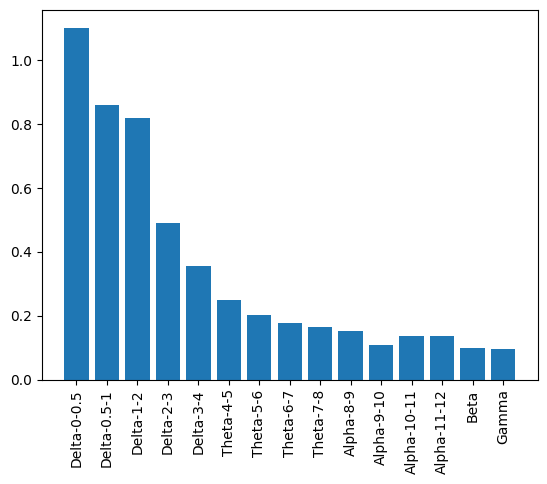

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.05243887 0.9160396  0.50966001 0.42455643 0.1830349  0.2531552
 0.2227051  0.17705543 0.16890369 0.1417394  0.1277092  0.11714011
 0.11115815 0.09071433 0.0869702 ]


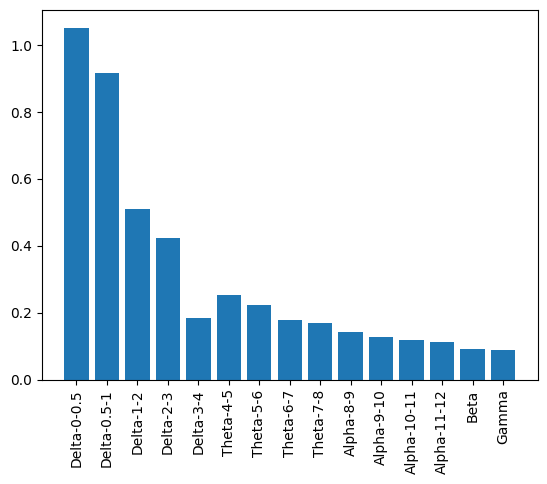

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.36650331 1.18863232 0.95711208 0.6795866  0.4479689  0.38061939
 0.2874027  0.20525023 0.18930893 0.1373576  0.11478568 0.09362456
 0.10255874 0.08227786 0.08362835]


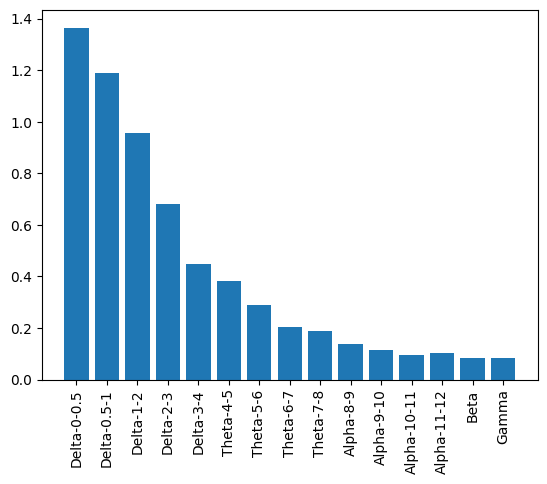

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.73081142 1.67796997 1.24177715 0.76814054 0.68764376 0.37126507
 0.28947233 0.2396564  0.15186451 0.19385286 0.14173742 0.1167582
 0.10730624 0.08960096 0.08608456]


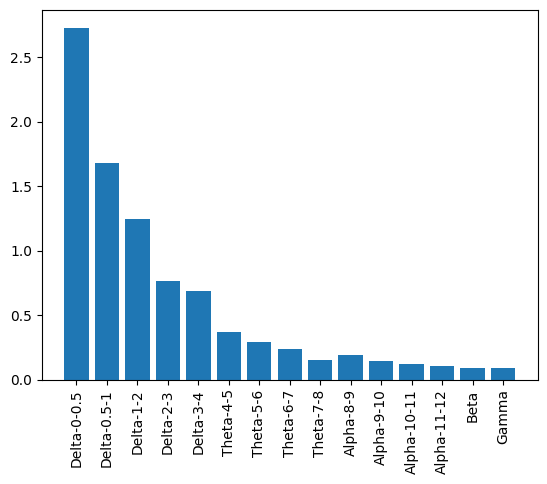

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.38117902 1.5337876  1.09603126 0.67280436 0.54972369 0.33490776
 0.30355897 0.23667987 0.22758517 0.13413429 0.15095136 0.13897517
 0.10558993 0.09767257 0.09230611]


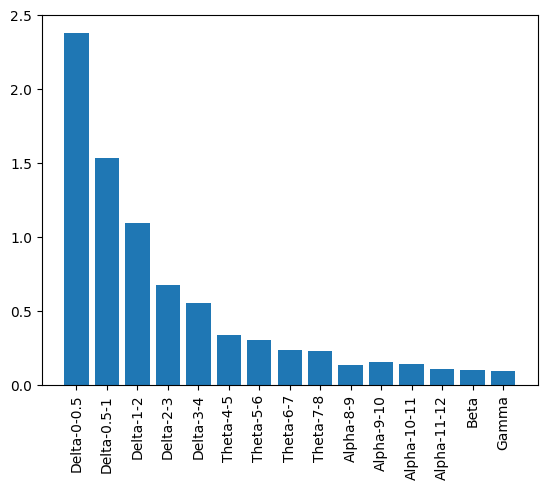

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[1.38560081 0.72445626 0.82478194 0.61005442 0.39462002 0.31300199
 0.25761951 0.2002507  0.14361694 0.14689523 0.13693443 0.111509
 0.12870132 0.09568096 0.10009647]


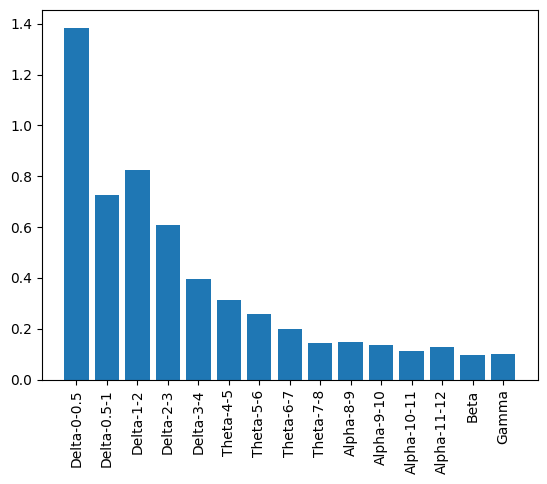

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.08587868 1.45435254 0.87838922 0.68917826 0.52123891 0.37040873
 0.24500392 0.29492314 0.17069527 0.19572063 0.12292645 0.13821515
 0.1115616  0.0933058  0.09675816]


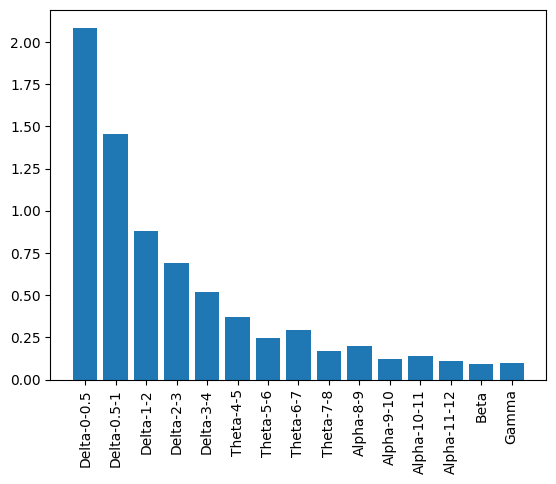

dict_keys(['Delta-0-0.5', 'Delta-0.5-1', 'Delta-1-2', 'Delta-2-3', 'Delta-3-4', 'Theta-4-5', 'Theta-5-6', 'Theta-6-7', 'Theta-7-8', 'Alpha-8-9', 'Alpha-9-10', 'Alpha-10-11', 'Alpha-11-12', 'Beta', 'Gamma'])
[2.5707521  1.7293568  1.28748048 0.87366855 0.65272004 0.44714005
 0.33718471 0.26533102 0.19910245 0.13983955 0.14073196 0.15080415
 0.12139404 0.09519801 0.09869497]


KeyboardInterrupt: 

In [6]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  '/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/origin_npy/Fpz-Cz/'

signals_npy_list = search_signals_npy(path)

for filename in signals_npy_list:
    signals = np.load(path+filename)
    length = len(signals[0])//fs//epoch_size
    print(signals.shape)
    for index in range(length):
        data = signals[0,int(index*fs*30) : int((index+1)*fs*30)]
        # Get real amplitudes of FFT (only in postive frequencies)
        fft_vals = np.absolute(np.fft.rfft(data)) / (fs*epoch_size)# real fft 계산 

        
        #         fft_vals[:1*30+1] = 0
        #         fft_vals[35*30:] = 0
        
        # Get frequencies for amplitudes in Hz
        fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

        # Define EEG bands
        eeg_bands = {'Delta-0-0.5': (0, 0.5),
                     'Delta-0.5-1': (0.5, 1),
                     'Delta-1-2': (1, 2),
                     'Delta-2-3': (2, 3),
                     'Delta-3-4': (3, 4),
                     'Theta-4-5': (4, 5),
                     'Theta-5-6': (5, 6),
                     'Theta-6-7': (6, 7),
                     'Theta-7-8': (7, 8),
                     'Alpha-8-9': (8, 9),
                     'Alpha-9-10': (9, 10),
                     'Alpha-10-11': (10, 11),
                     'Alpha-11-12': (11, 12),
                     'Beta': (12, 30),
                     'Gamma': (30, 45)}

        # Take the mean of the fft amplitude for each EEG band
        eeg_band_fft = []
        for band in eeg_bands:  
            #print('band : ',band)
            freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                               (fft_freq <= eeg_bands[band][1]))[0]
            
            eeg_band_fft.append(np.mean(fft_vals[freq_ix]))
        eeg_band_fft = np.array(eeg_band_fft)
        # Plot the data (using pandas here cause it's easy)

        print(eeg_bands.keys())
        print(eeg_band_fft)
        plt.bar(eeg_bands.keys(),eeg_band_fft)
        plt.xticks(rotation=90)
        plt.show()

In [5]:

fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

annotations_path = '/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/origin_npy/annotations/'

annotations_npy_list = search_signals_npy(path)

check_index_size = 10

for filename in annotations_npy_list:
    label_info = np.zeros([5],dtype=int)
    label = np.load(path + filename)
    
    

    plt.plot(label)
    plt.show()
    print('='*20)

In [6]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  '/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/origin_npy/annotations/'

signals_path = '/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/origin_npy/Fpz-Cz/'

save_annotations_path = path + 'remove_wake/'
save_signals_path = signals_path + 'remove_wake/'

os.makedirs(save_annotations_path,exist_ok=True)
os.makedirs(save_signals_path,exist_ok=True)
annotations_npy_list = search_signals_npy(path)

check_index_size = 10

total_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list:
    label = np.load(path + filename)
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    
    signals = np.load(signals_path+signals_filename)
    
    for remove_start_index in range(0,len(label),1):
        #print(np.bincount(label[remove_start_index:(remove_start_index+check_index_size)],minlength=6)[0])
        if(np.bincount(label[remove_start_index:(remove_start_index+check_index_size)],minlength=6)[0] != check_index_size):
            break
            
    for remove_end_index in range(len(label),-1,-1,):
        #print(np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[0])
        if(np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[0] != check_index_size and np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[5] == 0 ):
            break
    
    #print('remove start index : %d / remove end index : %d'%(remove_start_index,remove_end_index))
    label = label[remove_start_index:remove_end_index+1]
    signals = signals[0,remove_start_index*fs*epoch_size:(remove_end_index+1)*fs*epoch_size].reshape(1,-1)
    #print(np.bincount(label,minlength=6))
    if len(label) ==len(signals[0])//30//fs:
        np.save(save_annotations_path+filename.split('.')[0],label)
        np.save(save_signals_path+signals_filename.split('.')[0],signals)
    for i in range(6):
        total_label[i] += np.bincount(label,minlength=6)[i]
    
    
print(total_label)

[50767 21522 69132 13039 25835   288]
